# Pawracle Data Sheet

Results and statistics around "**Pawracle:** Euro '24 Edition". Have fun! 

## Data

The data is maintained in a simple CSV file ([pawracle-data.csv](https://github.com/ben-tinc/pawracle/blob/main/pawracle-data.csv)) which you can view online or download and inspect with any spreadsheet application (Libre Office, MS Office etc). For reference, I also print the complete table below:

In [25]:
# Essential libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# The dataset with all the dogs' bets
data = pd.read_csv('pawracle-data.csv', index_col=0)

In [27]:
# This is how the full table looks like:
data

,date,home,away,result,lokiTipp,lokiSide,siggiTipp,siggiSide,spencerTipp,spencerSide,darkoTipp,darkoSide,pointsForWin,numOfPossibleTipps
match,,,,,,,,,,,,,,
match1,14.06.24,Germany,Scotland,H,U,M,U,M,U,M,H,L,1,3
match2,15.06.24,Italy,Albania,H,A,L,H,R,H,L,A,L,1,3
match3,16.06.24,Serbia,England,A,U,M,A,M,A,M,U,M,1,3
match4,17.06.24,Austria,France,A,U,M,U,R,A,R,A,L,1,3
match5,18.06.24,Portugal,Czech Republic,H,A,L,H,R,H,R,A,R,1,3
match6,19.06.24,Scotland,Switzerland,U,H,L,A,R,U,M,U,M,1,3
match7,20.06.24,Spain,Italy,H,U,M,A,L,U,M,H,L,1,3
match8,21.06.24,Netherlands,France,U,U,M,U,L,H,L,U,M,1,3
match9,22.06.24,Belgium,Romania,H,H,L,H,R,A,R,A,L,1,3


**Data Coding:**

- `date`: date of match in the format **"dd.mm.yy"** 
- `result` and all `Tipp` columns: **H** (home team wins), **U** (draw), **A** (away team wins)
- all `Side` columns: **L** (left option picked), **M** (middle option), **R** (right option), all from the dog's perspective
- `pointsForWin`: a correct bet during group stage awards **1** point, during knock out phase **2** points
- `numOfPossibleTipps`: **3** during group stage, because draws are possible. Later on we only bet on who advances, so there are only **2** options.

## Results

### Current Ranking

First things first: which dog has scored the most points? Note that matches from the group phase only give a single point, while matches during the knockout phase give two!

In [28]:
data['lokiPts'] = data['pointsForWin'].where(data['lokiTipp'] == data['result'], other=0)
data['siggiPts'] = data['pointsForWin'].where(data['siggiTipp'] == data['result'], other=0)
data['spencerPts'] = data['pointsForWin'].where(data['spencerTipp'] == data['result'], other=0)
data['darkoPts'] = data['pointsForWin'].where(data['darkoTipp'] == data['result'], other=0)
points = pd.DataFrame(index=['Loki', 'Siggi', 'Spencer', 'Darko'])
points['Points'] = [data['lokiPts'].sum(), data['siggiPts'].sum(), data['spencerPts'].sum(), data['darkoPts'].sum()]
points

,Points
Loki,14
Siggi,15
Spencer,16
Darko,19


Or, if you prefer a visual ranking:

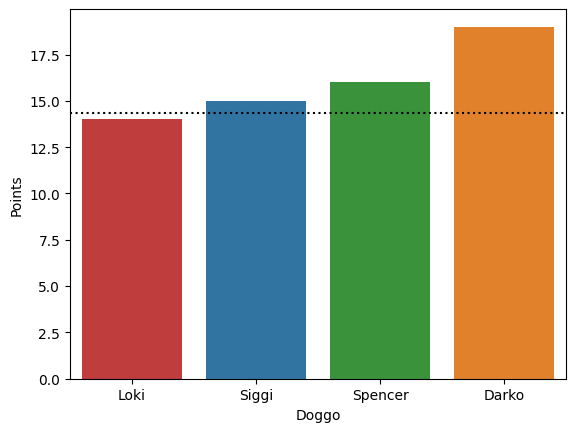

In [29]:
palette = sns.color_palette('tab10')
dog_palette = [palette[3], palette[0], palette[2], palette[1]]
sns.set_palette(dog_palette)
ax = sns.barplot(data=points, x=points.index, y=points['Points'], hue=points.index)
ax.set_xlabel('Doggo')
# render a horizontal line to mark expected score
data['expectedScore'] = (data['pointsForWin'] / data['numOfPossibleTipps']).cumsum()
expected_now = data['expectedScore'].iloc[(data['result'][data['result'] != 'x']).count() - 1]
ax.axhline(y=expected_now , xmin=0, xmax=1, color="black", linestyle="dotted")
plt.show(ax)

Note: the dotted line marks the expected value of the score.

### Scoring over time

In [30]:
# Calculate cumulative sum of points over time
over_time = pd.DataFrame()
over_time['Date'] = pd.to_datetime(data['date'], format='%d.%m.%y')
over_time['Loki'] = data['lokiPts'].cumsum()
over_time['Siggi'] = data['siggiPts'].cumsum()
over_time['Spencer'] = data['spencerPts'].cumsum()
over_time['Darko'] = data['darkoPts'].cumsum()
over_time['Expected'] = data['expectedScore']
over_time['Maximum'] = data['pointsForWin'].cumsum()

#### By date

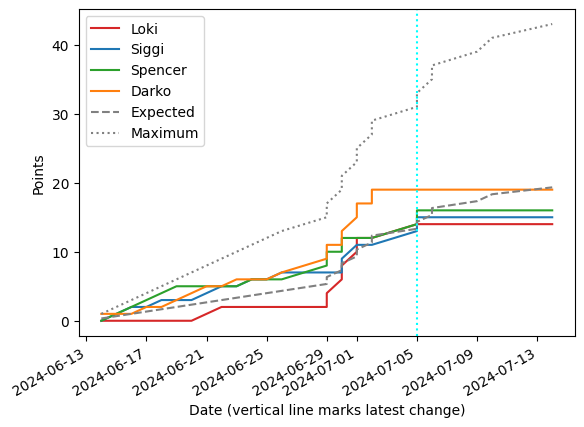

In [31]:
ot_palette = [c for c in dog_palette]
ot_palette.extend(['grey', 'grey'])

with sns.color_palette(ot_palette):
    # print(over_time['Date'])
    ax = over_time.plot(kind='line', x='Date',
                        y=['Loki', 'Siggi', 'Spencer', 'Darko', 'Expected', 'Maximum'],
                        style=['-', '-', '-', '-', '--', ':'])
    today = data[data['result'] != 'x'].iloc[-1]['date']
    ax.axvline(x=pd.to_datetime(today, format='%d.%m.%y'), ymin=0, ymax=1, color='cyan', linestyle=':')
    ax.set_ylabel('Points')
    ax.set_xlabel('Date (vertical line marks latest change)')
    plt.show(ax)

#### By match

The fact that there are often multiple matches per day makes it kind of hard to distinguish the individual matches. The following visualization shows the development after every game instead.

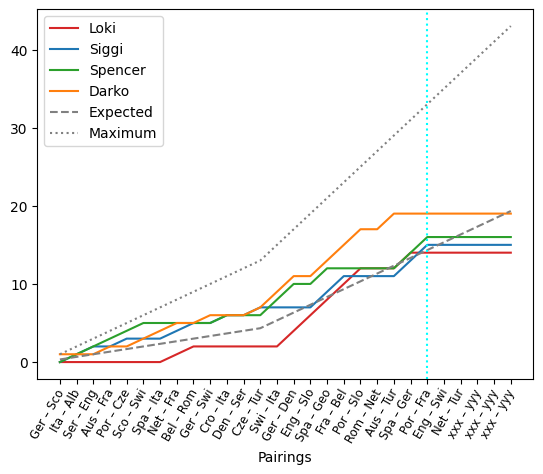

In [32]:
over_time['Pairings'] = data['home'].str[0:3] + ' – ' + data['away'].str[0:3]
with sns.color_palette(ot_palette):
    ax = over_time.plot(kind='line', x='Pairings',
                        y=['Loki', 'Siggi', 'Spencer', 'Darko', 'Expected', 'Maximum'],
                        style=['-', '-', '-', '-', '--', ':'])
    ax.set_xticks([idx for idx in range(over_time['Pairings'].size)],
                  over_time['Pairings'],
                  rotation=60, va='center_baseline', ha='right', rotation_mode='anchor',
                 size='small')
    latest = over_time[data['result'] != 'x']['Pairings'].size - 1
    ax.axvline(x=latest, ymin=0, ymax=1, color='cyan', linestyle=':')
    plt.show(ax)

## Choosing a Side (group stage only)

The doggos have notable preferences when it comes to choosing a particular side: Loki and Darko tend to the left, Spencer to the middle and Siggi to the right.

In [33]:
sides = pd.DataFrame(index=['Left', 'Middle', 'Right'])
# Only during the groupPhase have there been three choices:
onlyGroup = data[data['numOfPossibleTipps'] == 3]
sides['Loki'] = [(onlyGroup['lokiSide'] == 'L').sum(), (onlyGroup['lokiSide'] == 'M').sum(), (onlyGroup['lokiSide'] == 'R').sum()]
sides['Siggi'] = [(onlyGroup['siggiSide'] == 'L').sum(), (onlyGroup['siggiSide'] == 'M').sum(), (onlyGroup['siggiSide'] == 'R').sum()]
sides['Spencer'] = [(onlyGroup['spencerSide'] == 'L').sum(), (onlyGroup['spencerSide'] == 'M').sum(), (onlyGroup['spencerSide'] == 'R').sum()]
sides['Darko'] = [(onlyGroup['darkoSide'] == 'L').sum(), (onlyGroup['darkoSide'] == 'M').sum(), (onlyGroup['darkoSide'] == 'R').sum()]
sides['Total'] = sides['Loki'] + sides['Siggi'] + sides['Spencer'] + sides['Darko']
sides

,Loki,Siggi,Spencer,Darko,Total
Left,8,2,2,8,20
Middle,5,4,7,4,20
Right,0,7,4,1,12


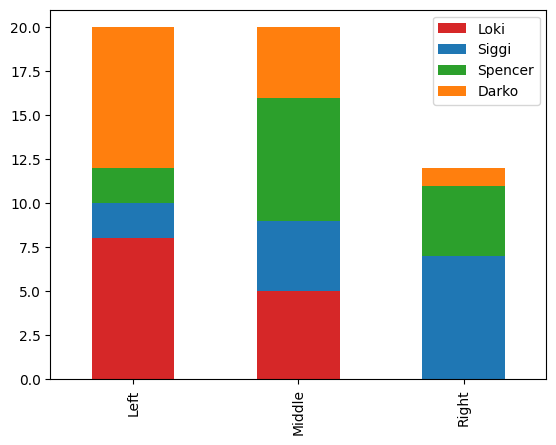

In [34]:
vis = sides.drop(['Total'], axis=1).plot(kind='bar', stacked=True)
plt.show(vis)

## Scoring by Side (group stage only)

In [35]:
sides['LokiPts'] = [onlyGroup['lokiPts'].where(onlyGroup['lokiSide']==res, other=0).sum() for res in ['L', 'M', 'R']]
sides['SiggiPts'] = [onlyGroup['siggiPts'].where(onlyGroup['siggiSide']==res, other=0).sum() for res in ['L', 'M', 'R']]
sides['SpencerPts'] = [onlyGroup['spencerPts'].where(onlyGroup['spencerSide']==res, other=0).sum() for res in ['L', 'M', 'R']]
sides['DarkoPts'] = [onlyGroup['darkoPts'].where(onlyGroup['darkoSide']==res, other=0).sum() for res in ['L', 'M', 'R']]
sides['TotalPts'] = sides['LokiPts'] + sides['SiggiPts'] + sides['SpencerPts'] + sides['DarkoPts']
sides['hitChance'] = sides['TotalPts'] / sides['Total']
sides.drop(['Loki', 'Siggi', 'Spencer', 'Darko'], axis=1)

,Total,LokiPts,SiggiPts,SpencerPts,DarkoPts,TotalPts,hitChance
Left,20,1,1,1,4,7,0.350000
Middle,20,1,3,3,3,10,0.500000
Right,12,0,3,2,0,5,0.416667


Individually, each doggo scores mainly on their preferred side, which is not surprising. Interestingly, the different sides score relatively evenly when taken all the doggos into account. The left side scores the worst, mostly due to Loki picking the side very often, albeit with limited results. But it still narrowly beats the 1/3 which one would expect. Right side and middle score even better, a testament to the generally very good results of the doggos during group stage. 

**Individual scoring by Side**

In [36]:
sides['hcLoki'] = sides['LokiPts'] / sides['Loki']
sides['hcSiggi'] = sides['SiggiPts'] / sides['Siggi']
sides['hcSpencer'] = sides['SpencerPts'] / sides['Spencer']
sides['hcDarko'] = sides['DarkoPts'] / sides['Darko']
sides.drop(['TotalPts', 'Total', 'hitChance', 'hcLoki', 'hcSiggi', 'hcSpencer', 'hcDarko'], axis=1)

,Loki,Siggi,Spencer,Darko,LokiPts,SiggiPts,SpencerPts,DarkoPts
Left,8,2,2,8,1,1,1,4
Middle,5,4,7,4,1,3,3,3
Right,0,7,4,1,0,3,2,0


In [37]:
sides.drop(['Loki', 'Siggi', 'Spencer', 'LokiPts', 'SiggiPts', 'SpencerPts', 'DarkoPts', 'Darko', 'TotalPts', 'Total',], axis=1)

,hitChance,hcLoki,hcSiggi,hcSpencer,hcDarko
Left,0.350000,0.125,0.500000,0.500000,0.50
Middle,0.500000,0.200,0.750000,0.428571,0.75
Right,0.416667,NaN,0.428571,0.500000,0.00


Looking at the hit chance for each side for each dog separately, we can see that the dogs have scored in very different ways. Spencer has scored very evenly across the three positions, while Siggi and Darko have found most of their success in the middle. This could be one factor as to why they are so close in the rankings, despite their wildly different side preferences. 

## What if?? Alternate Universes (group stage only)

The different sides have not had a fixed meaning – not for any doggo individually, and certainly not across all competitors. It is therefore interesting to have a look a alternate universes, where "picking left side" would always mean the same thing! There are six possible permutations of such a strict universe:

| Left | Middle | Right |
| :-: | :-: | :-: |
| H | U | A |
| H | A | U |
| U | H | A |
| U | A | H |
| A | H | U |
| A | U | H |

In [38]:
# Create a new universe, based on the premise that a certain side
# always maps to a certain meaning with regards to the chosen result.
def universe_with(original_results, mapping={'L': 'H', 'M': 'U', 'R': 'A'}):
    # Make sure to only include rows where three results are possible
    universe = original_results.copy()
    universe = universe[universe['numOfPossibleTipps'] == 3]
    # Replace tipp with alternate one
    universe['lokiTipp'] = universe['lokiSide'].apply(lambda s: mapping[s])
    universe['siggiTipp'] = universe['siggiSide'].apply(lambda s: mapping[s])
    universe['spencerTipp'] = universe['spencerSide'].apply(lambda s: mapping[s])
    universe['darkoTipp'] = universe['darkoSide'].apply(lambda s: mapping[s])
    # Calculate new points
    universe['lokiPts'] = universe['pointsForWin'].where(universe['lokiTipp'] == universe['result'], other=0)
    universe['siggiPts'] = universe['pointsForWin'].where(universe['siggiTipp'] == universe['result'], other=0)
    universe['spencerPts'] = universe['pointsForWin'].where(universe['spencerTipp'] == universe['result'], other=0)
    universe['darkoPts'] = universe['pointsForWin'].where(universe['darkoTipp'] == universe['result'], other=0)
    return universe

#### HUA Universe

In [39]:
alt_1 = universe_with(onlyGroup, mapping={'L': 'H', 'M': 'U','R': 'A'})
# Build comparison table
points_comp = pd.DataFrame(index=['Loki', 'Siggi', 'Spencer', 'Darko'])
points_comp['ActualPts'] = [onlyGroup[col].sum() for col in ['lokiPts', 'siggiPts', 'spencerPts', 'darkoPts']]
points_comp['HUA'] = [alt_1[col].sum() for col in ['lokiPts', 'siggiPts', 'spencerPts', 'darkoPts']]

#### HAU Universe

In [40]:
alt_2 = universe_with(onlyGroup, mapping={'L': 'H', 'M': 'A','R': 'U' })
points_comp['HAU'] = [alt_2[col].sum() for col in ['lokiPts', 'siggiPts', 'spencerPts', 'darkoPts']]

#### UHA Universe

In [41]:
alt_3 = universe_with(onlyGroup, mapping={'L': 'U', 'M': 'H', 'R': 'A'})
points_comp['UHA'] = [alt_3[col].sum() for col in ['lokiPts', 'siggiPts', 'spencerPts', 'darkoPts']]

#### UAH Universe

In [42]:
alt_4 = universe_with(onlyGroup, mapping={'L': 'U', 'M': 'A', 'R': 'H'})
points_comp['UAH'] = [alt_4[col].sum() for col in ['lokiPts', 'siggiPts', 'spencerPts', 'darkoPts']]

#### AHU Universe

In [43]:
alt_5 = universe_with(onlyGroup, mapping={'L': 'A', 'M': 'H', 'R': 'U'})
points_comp['AHU'] = [alt_5[col].sum() for col in ['lokiPts', 'siggiPts', 'spencerPts', 'darkoPts']]

#### AUH Universe

In [44]:
alt_6 = universe_with(onlyGroup, mapping={'L': 'A', 'M': 'U', 'R': 'H'})
points_comp['AUH'] = [alt_6[col].sum() for col in ['lokiPts', 'siggiPts', 'spencerPts', 'darkoPts']]

**Points scored in the alternate universes:**

In [45]:
points_comp

,ActualPts,HUA,HAU,UHA,UAH,AHU,AUH
Loki,2,4,5,6,6,3,2
Siggi,7,3,6,3,6,4,4
Spencer,6,7,2,5,4,2,6
Darko,7,7,5,2,4,2,6


To interpret these results, we have to remind ourselves that in our 13 group stage matches H and U results were more common than A.

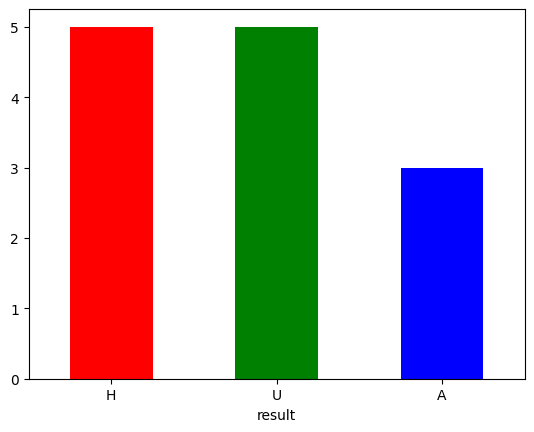

In [46]:
# only consider group stage
results = data[data['pointsForWin'] == 1]
ax = results['result'].value_counts().plot(kind='bar', rot=0, color=['red', 'green', 'blue'])
plt.show(ax)

So, if we combine all the "strict universes" each dog gets 26 points. How "fitting" any given universe is depends on the extend to which it matches the common results (i.e. H + U) to the dog's respective preferences (e.g. 'R' for Siggi). From this perspective, it is not surprising that Siggi scores well in the HAU and UAH universes, because in these the H and U results are located on the right. Conversely, Darko scores very well in the two universes where the U result is in the middle, especially in the one where H is on his preferred left side.

**Quick aside: Darkos Setting**

Incidentally, the strict universe AUH (so, with A instead of H on the left) is _very_ close to our actual setting. There are only three differences, and two of them have lead to Darko scoring! Seems suspicious, but the first difference is the very first match, where no pattern and no preference had been established, yet. And the other one is match7 between Spain and Italy, and one can argue that at that point in time there was no clear favourite for that match. The third difference was match5 between Portugal and Czechia, where Darko incorrectly bet on the away team.

Comparison between AUH universe and the real world for Darko:

In [47]:
darkoComp = pd.DataFrame()
darkoComp['real'] = onlyGroup[onlyGroup['darkoTipp']!='o']['darkoTipp']
darkoComp['AUH'] = alt_6['darkoTipp']
darkoComp

,real,AUH
match,,
match1,H,A
match2,A,A
match3,U,U
match4,A,A
match5,A,H
match6,U,U
match7,H,A
match8,U,U
match9,A,A
